### Gathering, Exploration and Cleaning

In [3]:
# import pandas"a library for data manipulation and analysis"
import pandas as pd
# import data from csv file
df = pd.read_csv('./super-market.csv')

In [4]:
# explore the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1006 non-null   object 
 1   Branch         1006 non-null   object 
 2   Yangon         1006 non-null   int64  
 3   Naypyitaw      1006 non-null   int64  
 4   Mandalay       1006 non-null   int64  
 5   Customer type  1006 non-null   object 
 6   Gender         1006 non-null   object 
 7   Product line   1006 non-null   object 
 8   Unit price     1006 non-null   object 
 9   Quantity       1006 non-null   int64  
 10  Tax 5%         997 non-null    float64
 11  Total          1003 non-null   float64
 12  Date           1006 non-null   object 
 13  Time           1006 non-null   object 
 14  Payment        1006 non-null   object 
 15  Rating         1006 non-null   float64
dtypes: float64(3), int64(4), object(9)
memory usage: 125.9+ KB


In [5]:
# make three columns to one column
df["Location"] = df[["Yangon","Naypyitaw","Mandalay"]].idxmax(axis=1)

In [6]:
# drop unused columns
df.drop(["Yangon","Naypyitaw","Mandalay"], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1006 non-null   object 
 1   Branch         1006 non-null   object 
 2   Customer type  1006 non-null   object 
 3   Gender         1006 non-null   object 
 4   Product line   1006 non-null   object 
 5   Unit price     1006 non-null   object 
 6   Quantity       1006 non-null   int64  
 7   Tax 5%         997 non-null    float64
 8   Total          1003 non-null   float64
 9   Date           1006 non-null   object 
 10  Time           1006 non-null   object 
 11  Payment        1006 non-null   object 
 12  Rating         1006 non-null   float64
 13  Location       1006 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 110.2+ KB


In [8]:
df.head()

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating,Location
0,750-67-8428,A,Normal,Male,Health and beauty,74.69,7,26.1415,NaN,1/5/2019,13:08,Ewallet,9.1,Yangon
1,226-31-3081,C,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,9.6,Naypyitaw
2,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,7.4,Yangon
3,123-19-1176,A,Normal,Male,Health and beauty,58.22,8,NaN,489.0480,1/27/2019,8 - 30 PM,Ewallet,8.4,Yangon
4,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,5.3,Yangon


In [9]:
df.tail()

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating,Location
1001,861-77-0145,C,Member,Male,Electronic accessories,81.97,10,40.9850,860.6850,3/3/2019,14:30,Cash,9.2,Naypyitaw
1002,479-26-8945,B,Member,Female,Sports and travel,16.49,2,1.6490,34.6290,2/5/2019,11:32,Ewallet,4.6,Mandalay
1003,210-67-5886,C,Member,Female,Health and beauty,98.21,3,14.7315,309.3615,2/5/2019,10:41,Credit card,7.8,Naypyitaw
1004,227-78-1148,B,Normal,Female,Fashion accessories,72.84,7,25.4940,535.3740,2/15/2019,12:44,Cash,8.4,Mandalay
1005,645-44-1170,A,Member,Male,Home and lifestyle,58.07,9,26.1315,548.7615,1/19/2019,20:07,Ewallet,4.3,Yangon


In [10]:
# delete rows with missing values
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [11]:
df.isnull().sum()

Invoice ID       0
Branch           0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
Total            0
Date             0
Time             0
Payment          0
Rating           0
Location         0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
# change the data type of the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [14]:

df["Customer type"].unique()

array(['Normal', '-', 'Member', 'Memberr'], dtype=object)

In [15]:
# replace the wrong values in the Customer type column
df["Customer type"] = df["Customer type"].replace("Memberr", "Member")
df["Customer type"] = df["Customer type"].replace("-", "Member")

In [16]:
df["Customer type"].unique()

array(['Normal', 'Member'], dtype=object)

In [17]:
df["Rating"].unique()

array([ 9.6,  7.4,  5.3,  4.1,  5.8,  8. ,  5.9,  4.5,  6.8,  7.1,  8.2,
        4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,  6. ,  8.5,  6.7,  7.7,
        7.5,  7. ,  7.6,  7.9,  6.3,  5.6,  7.2,  9.5,  8.4,  8.1,  6.5,
        6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,  8.7,  9.4,  5.7,
        5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,  8.8,  6.2,
        9.8,  9.1, 97. ,  5. ,  9.7,  8.9,  4.7])

In [18]:
# replace value 97 with 9.7 because it is a typo, the rating should be between 0 and 10
df["Rating"] = df["Rating"].replace(97, 9.7)

In [19]:
df["Rating"].unique()

array([ 9.6,  7.4,  5.3,  4.1,  5.8,  8. ,  5.9,  4.5,  6.8,  7.1,  8.2,
        4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,  6. ,  8.5,  6.7,  7.7,
        7.5,  7. ,  7.6,  7.9,  6.3,  5.6,  7.2,  9.5,  8.4,  8.1,  6.5,
        6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,  8.7,  9.4,  5.7,
        5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,  8.8,  6.2,
        9.8,  9.1,  9.7,  5. ,  8.9,  4.7])

In [20]:
# export cleaed data as csv file.
df.to_csv('./super-market-cleaned.csv', index=False)

### Analysis

In [21]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:

# Summary statistics
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
          Quantity      Tax 5%        Total                           Date  \
count  988.000000  988.000000   988.000000                            988   
mean     5.497976   15.404589   323.496360  2019-02-14 02:22:50.040485632   
min      1.000000    0.508500    10.678500            2019-01-01 00:00:00   
25%      3.000000    5.985500   125.695500            2019-01-24 00:00:00   
50%      5.000000   12.123000   254.583000            2019-02-14 00:00:00   
75%      8.000000   22.428500   470.998500            2019-03-08 00:00:00   
max     10.000000   49.650000  1042.650000            2019-03-30 00:00:00   
std      2.925449   11.707228   245.851789                            NaN   

           Rating  
count  988.000000  
mean     6.968725  
min      4.000000  
25%      5.500000  
50%      6.900000  
75%      8.500000  
max     10.000000  
std      1.716262  


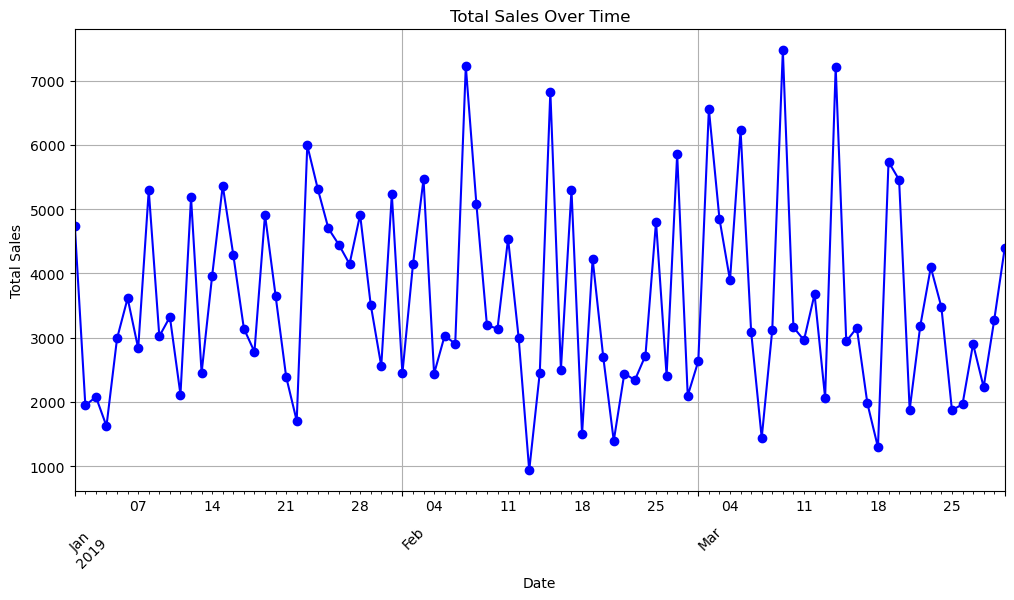

In [23]:
# Sales trend over time
plt.figure(figsize=(12, 6))
df.groupby("Date")["Total"].sum().plot(marker="o", linestyle="-", color="b")
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid()
plt.show()

/tmp/ipykernel_1876/1620507670.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Product line"], y=df["Total"], estimator=sum, palette="viridis")


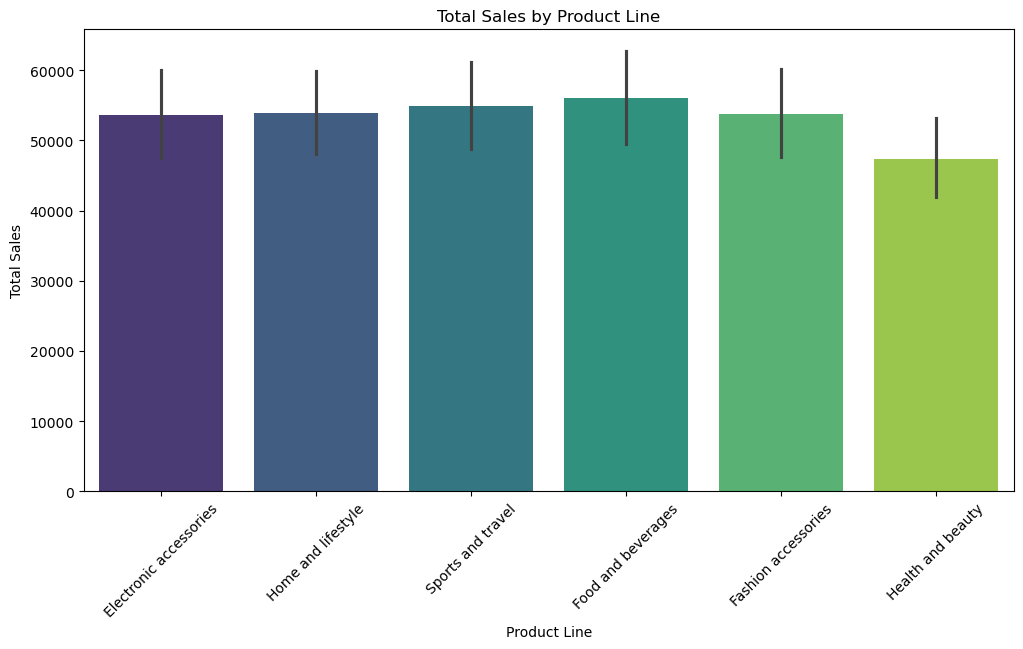

In [24]:
# Sales distribution by product line
plt.figure(figsize=(12, 6))
sns.barplot(x=df["Product line"], y=df["Total"], estimator=sum, palette="viridis")
plt.title("Total Sales by Product Line")
plt.xlabel("Product Line")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

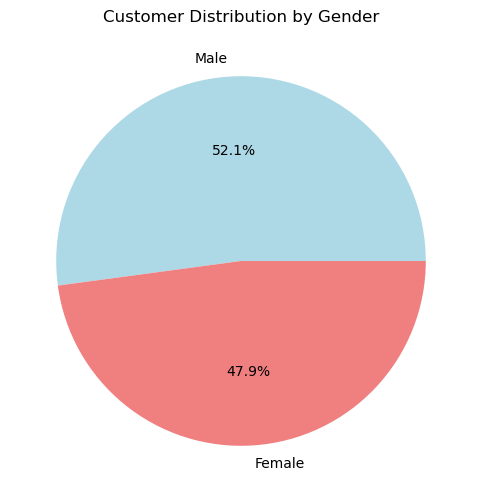

In [25]:
# Customer distribution by gender
plt.figure(figsize=(6, 6))
df["Gender"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["lightblue", "lightcoral"])
plt.title("Customer Distribution by Gender")
plt.ylabel("")
plt.show()

/tmp/ipykernel_1876/4065977785.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Payment", data=df, palette="coolwarm")


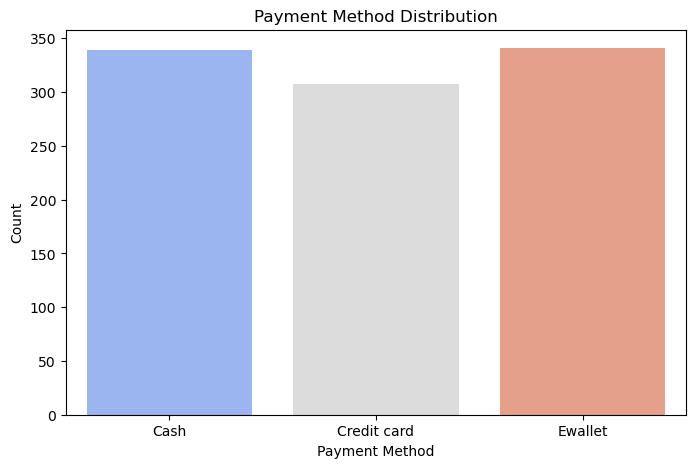

In [26]:
# Payment method distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="Payment", data=df, palette="coolwarm")
plt.title("Payment Method Distribution")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.show()